# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [20]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    sgd = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    rmsprop = keras.optimizers.RMSprop(lr=lr)
    adam = keras.optimizers.Adam(lr=lr)
    OPTIMIZER = [sgd, rmsprop, adam]
    OPTIMIZER_NAME =['sgd','rmsprop','adam']
    for optimizer,NAME in zip(OPTIMIZER,OPTIMIZER_NAME):
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        name_tag = "lr=%s;opt=%s" % (str(lr),NAME)
        results[name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 235us

50000/50000 [==============================] - 8s 161us/sample - loss: 1.4110 - accuracy: 0.5041 - val_loss: 1.6161 - val_accuracy: 0.4452
Epoch 49/50
50000/50000 [==============================] - 8s 161us/sample - loss: 1.4179 - accuracy: 0.5028 - val_loss: 1.6753 - val_accuracy: 0.4329
Epoch 50/50
50000/50000 [==============================] - 8s 161us/sample - loss: 1.4130 - accuracy: 0.5069 - val_loss: 1.6429 - val_accuracy: 0.4384
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 246us/sample - loss: 459.9128 - accuracy: 0.0990 - val_loss: 2.3168 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 12s 239us/sample - loss: 2.3079 - accuracy: 0.0988 - val_loss: 2.3184 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 241us/sample - loss: 2.3081 - accuracy: 0.0988 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================

50000/50000 [==============================] - 8s 164us/sample - loss: 2.3080 - accuracy: 0.0985 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 158us/sample - loss: 2.3073 - accuracy: 0.1007 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 158us/sample - loss: 2.3071 - accuracy: 0.0989 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 159us/sample - loss: 2.3063 - accuracy: 0.1009 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 159us/sample - loss: 2.3067 - accuracy: 0.0998 - val_loss: 2.3084 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 162us/sample - loss: 2.3071 - accuracy: 0.0989 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 160us/sample - loss: 2.3072 - accuracy: 0.1012 - v

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 158us/sample - loss: 1.8328 - accuracy: 0.3419 - val_loss: 1.7105 - val_accuracy: 0.3856
Epoch 2/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.6055 - accuracy: 0.4304 - val_loss: 1.6296 - val_accuracy: 0.4180
Epoch 3/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.5140 - accuracy: 0.4634 - val_loss: 1.5711 - val_accuracy: 0.4447
Epoch 4/50
50000/50000 [==============================] - 8s 154us/sample - loss: 1.4515 - accuracy: 0.4836 - val_loss: 1.5165 - val_accuracy: 0.4567
Epoch 5/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.4046 - accuracy: 0.5009 - val_loss: 1.5086 - val_accuracy: 0.4686
Epoch 6/50
50000/50000 [==============================] - 8s 154us/sample - loss: 1.3659 - accuracy: 0.5152 - val_loss: 1.4995 - val_accuracy: 0.4708
Epoch 7/50
50000/50000 [==========================

50000/50000 [==============================] - 11s 228us/sample - loss: 2.3031 - accuracy: 0.0998 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 228us/sample - loss: 2.3031 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 224us/sample - loss: 2.3031 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 223us/sample - loss: 2.3032 - accuracy: 0.0981 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 8/50
50000/50000 [==============================] - 11s 224us/sample - loss: 2.3032 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 11s 222us/sample - loss: 2.3031 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 11s 223us/sample - loss: 2.3031 - accuracy: 0.

Epoch 8/50
50000/50000 [==============================] - 8s 161us/sample - loss: 2.3031 - accuracy: 0.0996 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 8s 164us/sample - loss: 2.3032 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 8s 162us/sample - loss: 2.3031 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 8s 160us/sample - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 12/50
50000/50000 [==============================] - 8s 163us/sample - loss: 2.3031 - accuracy: 0.1007 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 13/50
50000/50000 [==============================] - 8s 161us/sample - loss: 2.3032 - accuracy: 0.0969 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 14/50
50000/50000 [==============================] - 8s 160us/sample - loss: 2.3030 - accu

50000/50000 [==============================] - 8s 156us/sample - loss: 1.6143 - accuracy: 0.4364 - val_loss: 1.5998 - val_accuracy: 0.4401
Epoch 6/50
50000/50000 [==============================] - 8s 160us/sample - loss: 1.5746 - accuracy: 0.4497 - val_loss: 1.5704 - val_accuracy: 0.4521
Epoch 7/50
50000/50000 [==============================] - 8s 156us/sample - loss: 1.5415 - accuracy: 0.4619 - val_loss: 1.5507 - val_accuracy: 0.4562
Epoch 8/50
50000/50000 [==============================] - 8s 156us/sample - loss: 1.5132 - accuracy: 0.4710 - val_loss: 1.5289 - val_accuracy: 0.4610
Epoch 9/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.4867 - accuracy: 0.4795 - val_loss: 1.5121 - val_accuracy: 0.4646
Epoch 10/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.4600 - accuracy: 0.4894 - val_loss: 1.4844 - val_accuracy: 0.4799
Epoch 11/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.4373 - accuracy: 0.4979 -

50000/50000 [==============================] - 12s 235us/sample - loss: 1.5125 - accuracy: 0.4615 - val_loss: 1.6424 - val_accuracy: 0.4161
Epoch 10/50
50000/50000 [==============================] - 11s 229us/sample - loss: 1.4697 - accuracy: 0.4789 - val_loss: 1.6079 - val_accuracy: 0.4466
Epoch 11/50
50000/50000 [==============================] - 11s 228us/sample - loss: 1.4459 - accuracy: 0.4847 - val_loss: 1.6301 - val_accuracy: 0.4191
Epoch 12/50
50000/50000 [==============================] - 11s 227us/sample - loss: 1.4160 - accuracy: 0.4964 - val_loss: 1.5891 - val_accuracy: 0.4356
Epoch 13/50
50000/50000 [==============================] - 11s 224us/sample - loss: 1.3938 - accuracy: 0.5047 - val_loss: 1.5905 - val_accuracy: 0.4441
Epoch 14/50
50000/50000 [==============================] - 11s 224us/sample - loss: 1.3671 - accuracy: 0.5154 - val_loss: 1.4972 - val_accuracy: 0.4696
Epoch 15/50
50000/50000 [==============================] - 11s 229us/sample - loss: 1.3400 - accurac

Epoch 13/50
50000/50000 [==============================] - 7s 149us/sample - loss: 0.5452 - accuracy: 0.8044 - val_loss: 2.1395 - val_accuracy: 0.5145
Epoch 14/50
50000/50000 [==============================] - 7s 149us/sample - loss: 0.5441 - accuracy: 0.8040 - val_loss: 2.3173 - val_accuracy: 0.5079
Epoch 15/50
50000/50000 [==============================] - 7s 150us/sample - loss: 0.5378 - accuracy: 0.8075 - val_loss: 2.3041 - val_accuracy: 0.5198
Epoch 16/50
50000/50000 [==============================] - 7s 149us/sample - loss: 0.5210 - accuracy: 0.8141 - val_loss: 2.2879 - val_accuracy: 0.5120
Epoch 17/50
50000/50000 [==============================] - 7s 150us/sample - loss: 0.5078 - accuracy: 0.8166 - val_loss: 2.4016 - val_accuracy: 0.5181
Epoch 18/50
50000/50000 [==============================] - 8s 150us/sample - loss: 0.4880 - accuracy: 0.8256 - val_loss: 2.3881 - val_accuracy: 0.5188
Epoch 19/50
50000/50000 [==============================] - 7s 150us/sample - loss: 0.4803 - ac

In [19]:
results.keys()

dict_keys([])

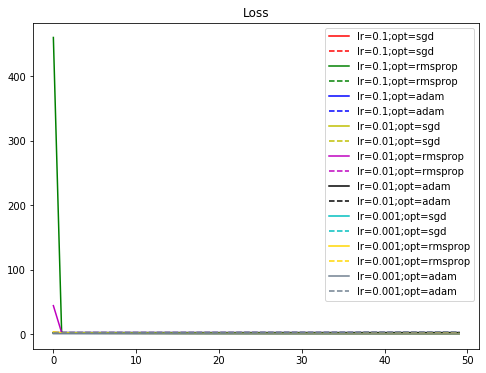

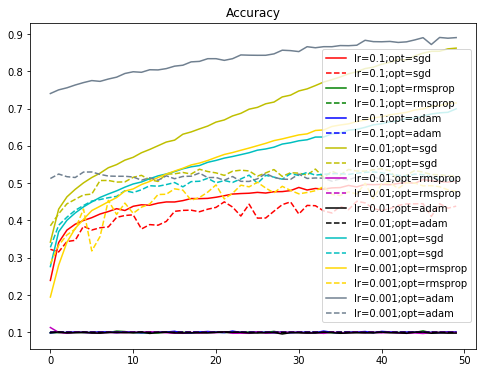

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","gold","slategray"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()